In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("HomeC.csv", low_memory=False)

df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (108793, 31)


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:01,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:02,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:03,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:04,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [3]:
df = df.ffill()

print("Remaining Missing Values:", df.isnull().sum().sum())


Remaining Missing Values: 0


In [4]:
numeric_cols = df.select_dtypes(include=np.number).columns
df = df[numeric_cols]

print("Numeric Columns Count:", len(numeric_cols))


Numeric Columns Count: 28


In [5]:
mean_vals = df.mean()
std_vals = df.std()

print("Mean Values:")
display(mean_vals)

print("Standard Deviation Values:")
display(std_vals)


Mean Values:


use [kW]                  0.956471
gen [kW]                  0.066935
House overall [kW]        0.956471
Dishwasher [kW]           0.033798
Furnace 1 [kW]            0.192918
Furnace 2 [kW]            0.221994
Home office [kW]          0.078773
Fridge [kW]               0.053771
Wine cellar [kW]          0.020883
Garage door [kW]          0.013710
Kitchen 12 [kW]           0.002332
Kitchen 14 [kW]           0.007424
Kitchen 38 [kW]           0.000010
Barn [kW]                 0.063928
Well [kW]                 0.017044
Microwave [kW]            0.009625
Living room [kW]          0.039231
Solar [kW]                0.066935
temperature              32.241496
humidity                  0.618105
visibility                9.261060
apparentTemperature      26.442536
pressure               1015.549272
windSpeed                 7.697757
windBearing             211.148153
precipIntensity           0.002676
dewPoint                 19.763452
precipProbability         0.056084
dtype: float64

Standard Deviation Values:


use [kW]                 0.683917
gen [kW]                 0.129032
House overall [kW]       0.683917
Dishwasher [kW]          0.198033
Furnace 1 [kW]           0.211832
Furnace 2 [kW]           0.241042
Home office [kW]         0.097402
Fridge [kW]              0.070946
Wine cellar [kW]         0.036835
Garage door [kW]         0.009732
Kitchen 12 [kW]          0.024959
Kitchen 14 [kW]          0.080655
Kitchen 38 [kW]          0.000010
Barn [kW]                0.153819
Well [kW]                0.142919
Microwave [kW]           0.085772
Living room [kW]         0.101848
Solar [kW]               0.129032
temperature             13.211532
humidity                 0.166915
visibility               1.673352
apparentTemperature     15.992602
pressure                 9.066171
windSpeed                4.210377
windBearing            105.651502
precipIntensity          0.012296
dewPoint                14.154797
precipProbability        0.166708
dtype: float64

In [6]:
for col in df.columns:
    upper = mean_vals[col] + (2 * std_vals[col])
    lower = mean_vals[col] - (2 * std_vals[col])

    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

print("Outlier Handling Completed")


Outlier Handling Completed


In [7]:
original_rows = pd.read_csv("HomeC.csv", low_memory=False).shape[0]
cleaned_rows = df.shape[0]

print("Original Rows:", original_rows)
print("Rows After Cleaning:", cleaned_rows)


Original Rows: 108793
Rows After Cleaning: 108793


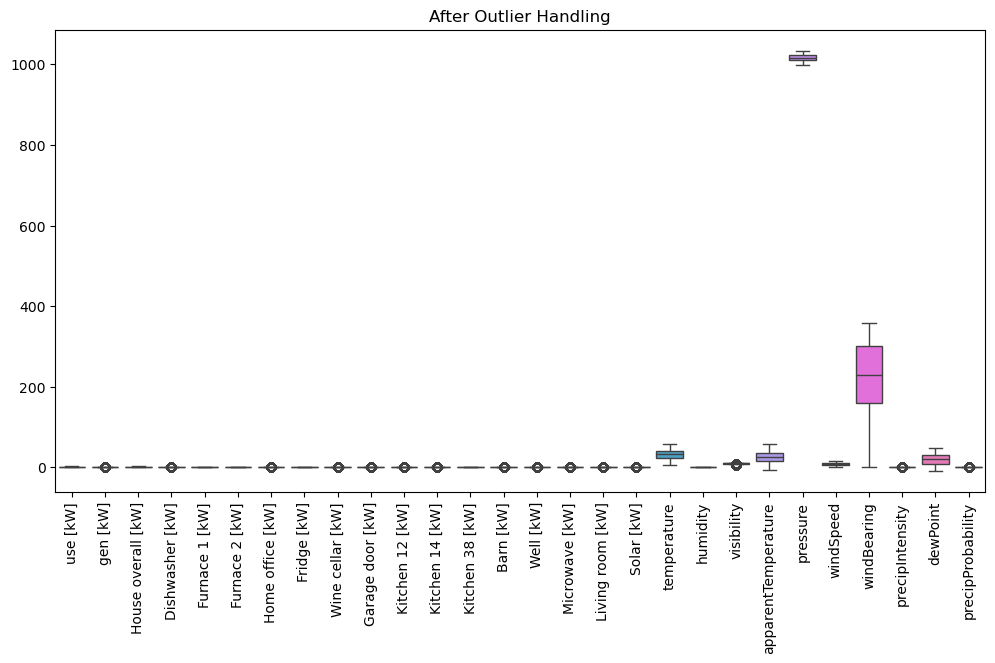

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("After Outlier Handling")
plt.show()


In [9]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

print("Scaling Completed")
df_scaled.head()


Scaling Completed


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.401330,0.010718,0.401330,0.000077,0.033546,0.087465,1.0,0.634264,0.072876,0.390108,...,0.573771,0.502838,1.0,0.544043,0.537522,0.567114,0.785515,0.0,0.58189,0.0
2016-01-01 05:00:01,0.401975,0.010667,0.401975,0.000000,0.033573,0.090165,1.0,0.633496,0.072876,0.391120,...,0.573771,0.502838,1.0,0.544043,0.537522,0.567114,0.785515,0.0,0.58189,0.0
2016-01-01 05:00:02,0.400892,0.010667,0.400892,0.000039,0.033546,0.088033,1.0,0.631110,0.072876,0.390108,...,0.573771,0.502838,1.0,0.544043,0.537522,0.567114,0.785515,0.0,0.58189,0.0
2016-01-01 05:00:03,0.439715,0.010718,0.439715,0.000039,0.173353,0.096844,1.0,0.629064,0.072876,0.387578,...,0.573771,0.502838,1.0,0.544043,0.537522,0.567114,0.785515,0.0,0.58189,0.0
2016-01-01 05:00:04,0.490204,0.010667,0.490204,0.000310,0.384252,0.090402,1.0,0.627615,0.071464,0.381000,...,0.573771,0.502838,1.0,0.544043,0.537522,0.567114,0.785515,0.0,0.58189,0.0


In [11]:
df_scaled.describe().loc[['min','max']]


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
target = 'House overall [kW]'

correlation_with_target = df_scaled.corr()[target].sort_values(ascending=False)

print("Correlation with Target Variable:")
display(correlation_with_target)


Correlation with Target Variable:


use [kW]               1.000000
House overall [kW]     1.000000
Furnace 2 [kW]         0.567033
Furnace 1 [kW]         0.387848
Living room [kW]       0.346593
Dishwasher [kW]        0.304795
Well [kW]              0.234211
Barn [kW]              0.197449
Fridge [kW]            0.194915
Home office [kW]       0.192722
Kitchen 14 [kW]        0.151395
Microwave [kW]         0.135946
Kitchen 38 [kW]        0.120644
Wine cellar [kW]       0.095190
Kitchen 12 [kW]        0.092728
windBearing            0.049140
windSpeed              0.045973
visibility             0.015924
humidity               0.004177
pressure              -0.020928
Garage door [kW]      -0.043004
precipIntensity       -0.047384
precipProbability     -0.066371
dewPoint              -0.153109
temperature           -0.191207
apparentTemperature   -0.197153
Solar [kW]            -0.360119
gen [kW]              -0.360119
Name: House overall [kW], dtype: float64

In [13]:
cv = (std_vals / mean_vals) * 100

cv_sorted = cv.sort_values(ascending=False)

print("Feature Variability Ranking (Coefficient of Variation %):")
display(cv_sorted)


Feature Variability Ranking (Coefficient of Variation %):


Kitchen 14 [kW]        1086.403775
Kitchen 12 [kW]        1070.224387
Microwave [kW]          891.135902
Well [kW]               838.543705
Dishwasher [kW]         585.940973
precipIntensity         459.574995
precipProbability       297.245004
Living room [kW]        259.613262
Barn [kW]               240.613117
Solar [kW]              192.771688
gen [kW]                192.771679
Wine cellar [kW]        176.386686
Fridge [kW]             131.940554
Home office [kW]        123.649302
Furnace 1 [kW]          109.804547
Furnace 2 [kW]          108.580568
Kitchen 38 [kW]         101.651870
dewPoint                 71.621076
House overall [kW]       71.504248
use [kW]                 71.504248
Garage door [kW]         70.981464
apparentTemperature      60.480590
windSpeed                54.696151
windBearing              50.036669
temperature              40.976797
humidity                 27.004315
visibility               18.068687
pressure                  0.892736
dtype: float64

In [14]:
skewness = df.skew().sort_values(ascending=False)

print("Skewness of Features:")
display(skewness)


Skewness of Features:


Microwave [kW]         13.087546
Kitchen 12 [kW]        10.602784
Kitchen 14 [kW]         8.769486
Well [kW]               8.069642
Garage door [kW]        7.356452
Dishwasher [kW]         5.640636
precipIntensity         3.676958
Barn [kW]               3.138938
precipProbability       2.662541
Home office [kW]        2.482801
Living room [kW]        2.397996
Wine cellar [kW]        2.311813
Solar [kW]              1.790065
gen [kW]                1.790065
Furnace 2 [kW]          1.166267
Furnace 1 [kW]          0.763988
House overall [kW]      0.709715
use [kW]                0.709715
Fridge [kW]             0.568970
windSpeed               0.431865
Kitchen 38 [kW]         0.328896
apparentTemperature     0.100486
temperature             0.087326
dewPoint                0.063682
pressure               -0.006709
humidity               -0.031357
windBearing            -0.638927
visibility             -2.131224
dtype: float64

In [15]:
feature_strength = df_scaled.corr()[target].abs().sort_values(ascending=False)

print("Feature Strength with Target (Absolute Correlation):")
display(feature_strength)


Feature Strength with Target (Absolute Correlation):


use [kW]               1.000000
House overall [kW]     1.000000
Furnace 2 [kW]         0.567033
Furnace 1 [kW]         0.387848
gen [kW]               0.360119
Solar [kW]             0.360119
Living room [kW]       0.346593
Dishwasher [kW]        0.304795
Well [kW]              0.234211
Barn [kW]              0.197449
apparentTemperature    0.197153
Fridge [kW]            0.194915
Home office [kW]       0.192722
temperature            0.191207
dewPoint               0.153109
Kitchen 14 [kW]        0.151395
Microwave [kW]         0.135946
Kitchen 38 [kW]        0.120644
Wine cellar [kW]       0.095190
Kitchen 12 [kW]        0.092728
precipProbability      0.066371
windBearing            0.049140
precipIntensity        0.047384
windSpeed              0.045973
Garage door [kW]       0.043004
pressure               0.020928
visibility             0.015924
humidity               0.004177
Name: House overall [kW], dtype: float64

In [16]:
X = df_scaled.drop(columns=[target])
y = df_scaled[target]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (108793, 27)
Target Shape: (108793,)


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=False
)

print("Train Size:", X_train.shape)
print("Validation Size:", X_val.shape)
print("Test Size:", X_test.shape)


Train Size: (76155, 27)
Validation Size: (16319, 27)
Test Size: (16319, 27)


In [18]:
print("Train Range:", X_train.index.min(), "to", X_train.index.max())
print("Validation Range:", X_val.index.min(), "to", X_val.index.max())
print("Test Range:", X_test.index.min(), "to", X_test.index.max())


Train Range: 2016-01-01 05:00:00 to 2016-01-02 02:09:14
Validation Range: 2016-01-02 02:09:15 to 2016-01-02 06:41:13
Test Range: 2016-01-02 06:41:14 to 2016-01-02 11:13:12
